In [1]:
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
%matplotlib inline
# To change the default values
params = {"ytick.color" : "w",
          "xtick.color" : "w",
          "axes.labelcolor" : "w",
          "axes.edgecolor" : "w"}
            
plt.rcParams.update(params)
from sklearn.datasets import make_regression
import seaborn as sns

In [6]:
# LOGISTIC REGRESSION

mean_01 = np.array([1,0.5])
cov_01 = np.array([[1,0.1],[0.1,1.2]])

mean_02 = np.array([4,5])
cov_02 = np.array([[1,0.1],[0.1,1.2]])

dist_01 = np.random.multivariate_normal(mean_01,cov_01,500)
dist_02 = np.random.multivariate_normal(mean_02,cov_02,500)
print dist_01.shape, dist_02.shape

(500, 2) (500, 2)


1000
3
(1000, 3)
[ 2.48392179  2.76348055  0.5       ]


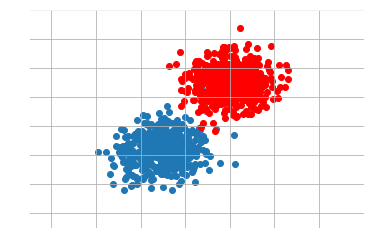

In [4]:
r = dist_01.shape[0] + dist_02.shape[0]
print r
c = dist_01.shape[1] + 1
print c
data = np.zeros((r,c))
print data.shape

data[:dist_01.shape[0], :2] = dist_01
data[dist_01.shape[0]:, :2] = dist_02
data[dist_01.shape[0]:,-1] = 1.0

print data.mean(axis=0)

plt.figure(0)
plt.xlim(-5,10)
plt.ylim(-5,10)

plt.scatter(dist_01[:,0], dist_01[:,1])
plt.scatter(dist_02[:,0], dist_02[:,1], color='r')
plt.grid(True)
plt.show()

In [34]:
split = int(0.8 * data.shape[0])

x_train = data[:split,:-1]
x_test = data[split:,:-1]

y_train = data[:split,-1]
y_test = data[split:,-1]

print x_train.shape, x_test.shape
print y_train.shape, y_test.shape

(800, 2) (200, 2)
(800,) (200,)


In [35]:
def hypothesis(x,w,b):
    h = (x*w).sum() + b
    return sigmoid(h)
    
    
def sigmoid(z):
    return 1.0 / (1 + np.exp(-1 * z))
    
    
def get_error(y_true,x,w,b):
    err = 0.0
    m = x.shape[0]
    for ix in range(m):
        # For each compute the binary cross entropy
        if y_true[ix] == 1:
            err += -1.0 * np.log2(hypothesis(x[ix], w, b))
        else:
            err += -1.0 * 1 - np.log2(hypothesis(x[ix], w, b))
    err = err / m
    return err
    
    # error gradient
def get_gradients(y_true,x,w,b):
    grad_w = np.zeros(w.shape)
    grad_b = 0.0
    m = x.shape[0]
    
    for ix in range(m):
        grad_w += (y_true[ix] - hypothesis(x[ix],w,b))*(x[ix])*-1
        grad_b += (y_true[ix] - hypothesis(x[ix],w,b))* (-1)
        
        grad_w = grad_w / m
        grad_b = grad_b / m
        
    return [grad_w,grad_b]
    
def gradients_descent(x,y_true,w,b,learning_rate=0.02):
    error = get_error(y_true,x,w,b)
    [grad_w,grad_b] = get_gradients(y_true,x,w,b)
    w = w - learning_rate*grad_w
    b = b - learning_rate*grad_b
    return error,w,b

    
def predict(x,w,b):
    prob = hypothesis(x,w,b)
    
    if prob < 0.5:
        return 0
    else:
        return 1
    
    
def get_accuracy(x_test,y_test,w,b):
    y_pred = []
    for ix in range(y_test.shape[0]):
        y_pred.append(predict(x_test,w,b))
    y_pred  = np.asarray(y_pred)
    return float((y_pred==y_test).sum()/y_test.shape[0])

In [36]:
for ix in range(100):
    l,w,b = gradients_descent(x_train,y_train,w,b)
    acc.append(get_accuracy(x_test,y_test,w,b))
    loss.append(l)

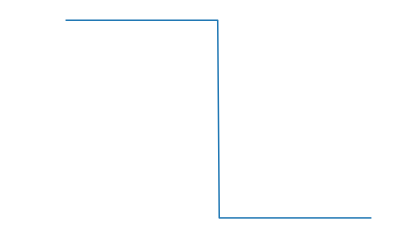

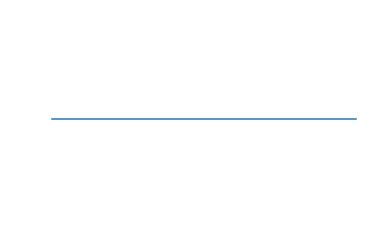

In [37]:
plt.figure(0)
plt.plot(loss)

plt.figure(1)
plt.plot(acc)

plt.show()

In [38]:
acc[-1]

1.0